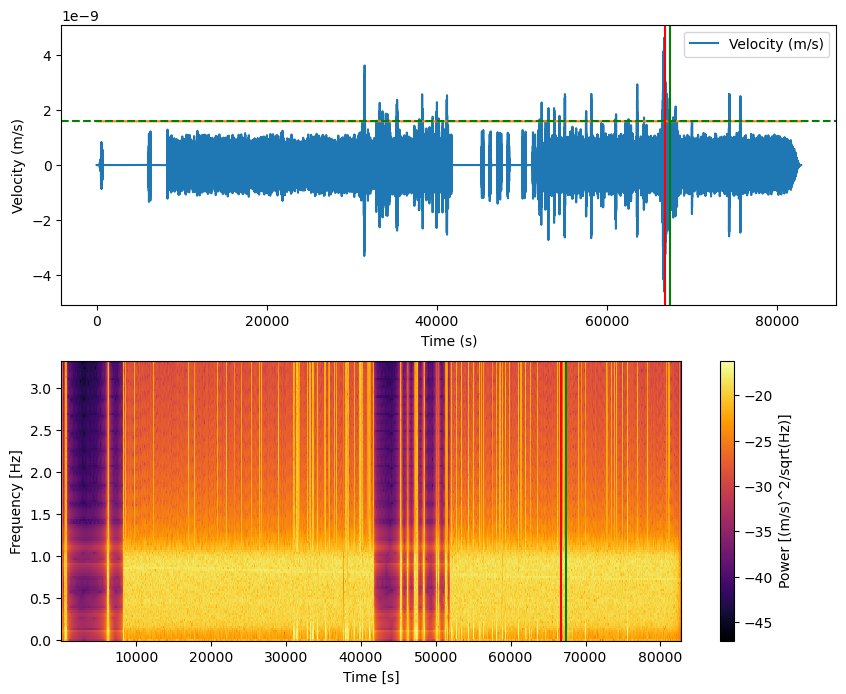

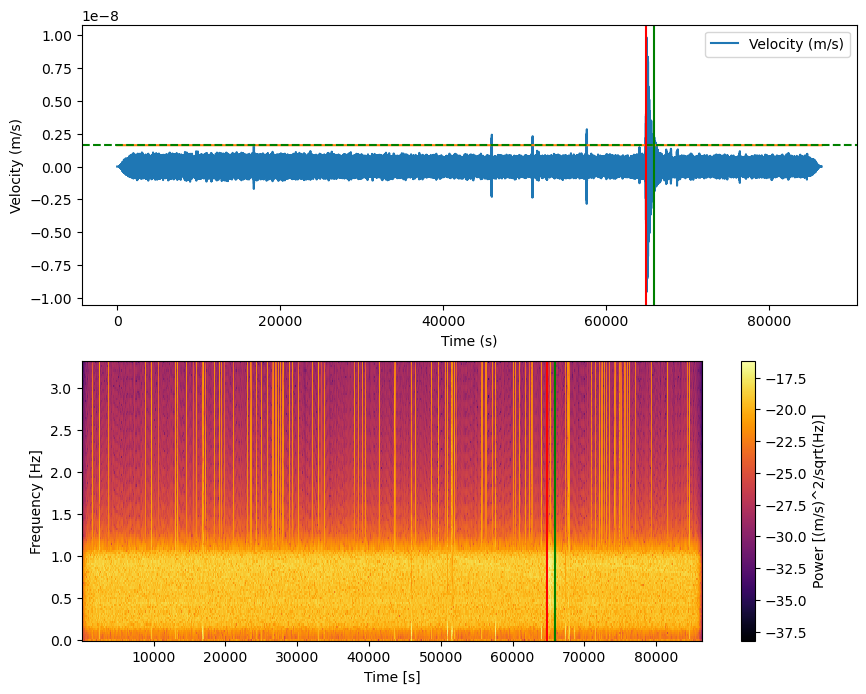

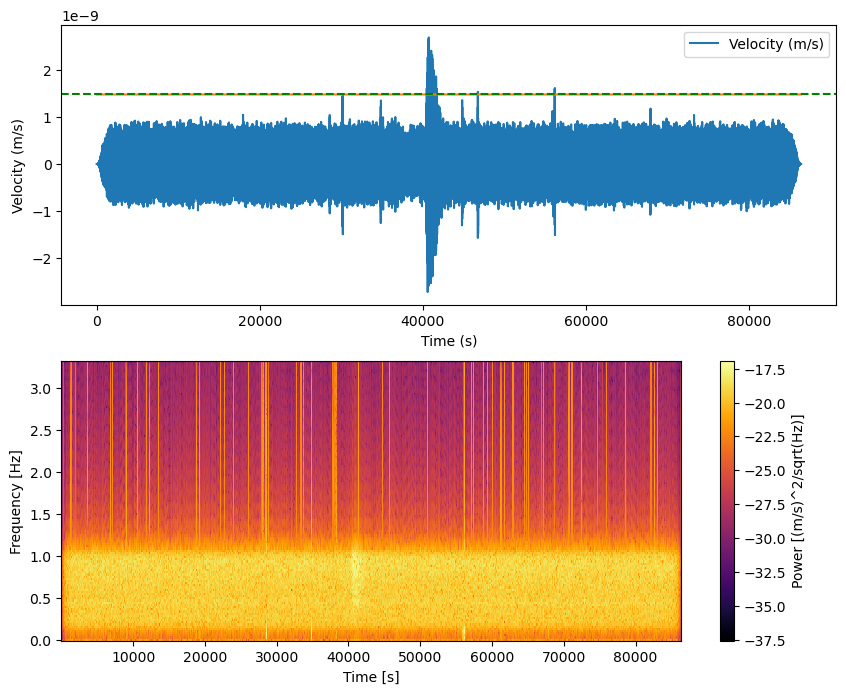

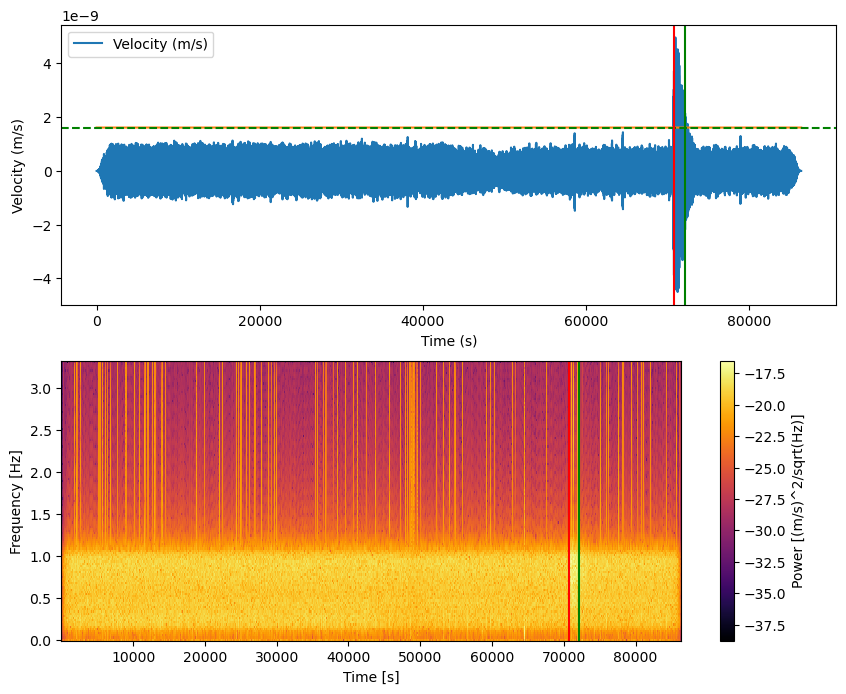

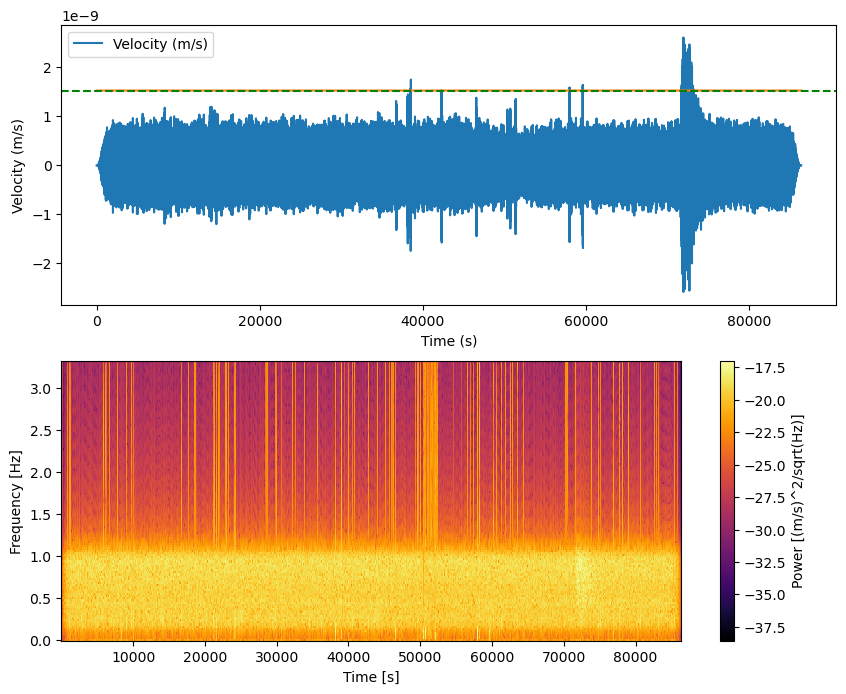

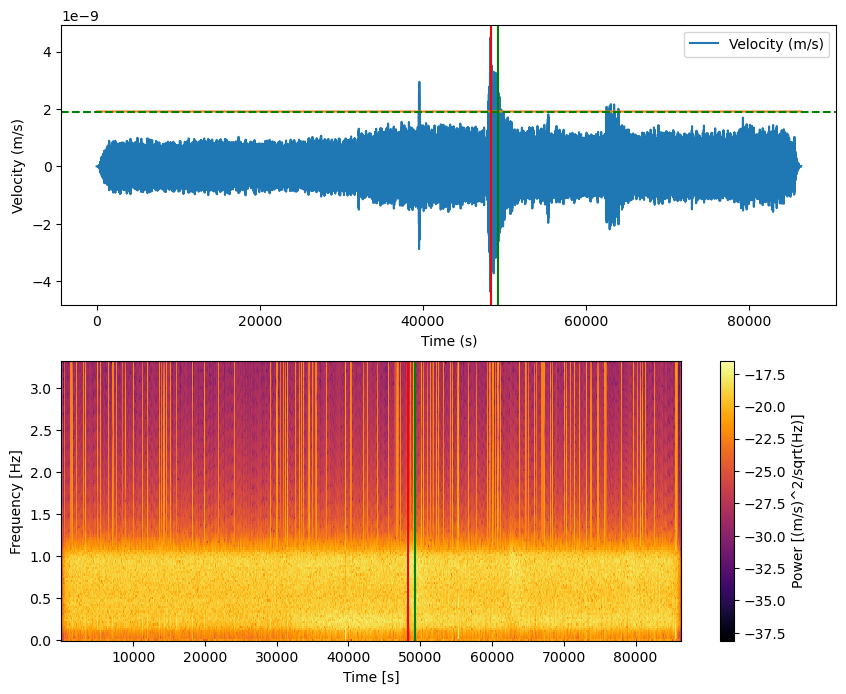

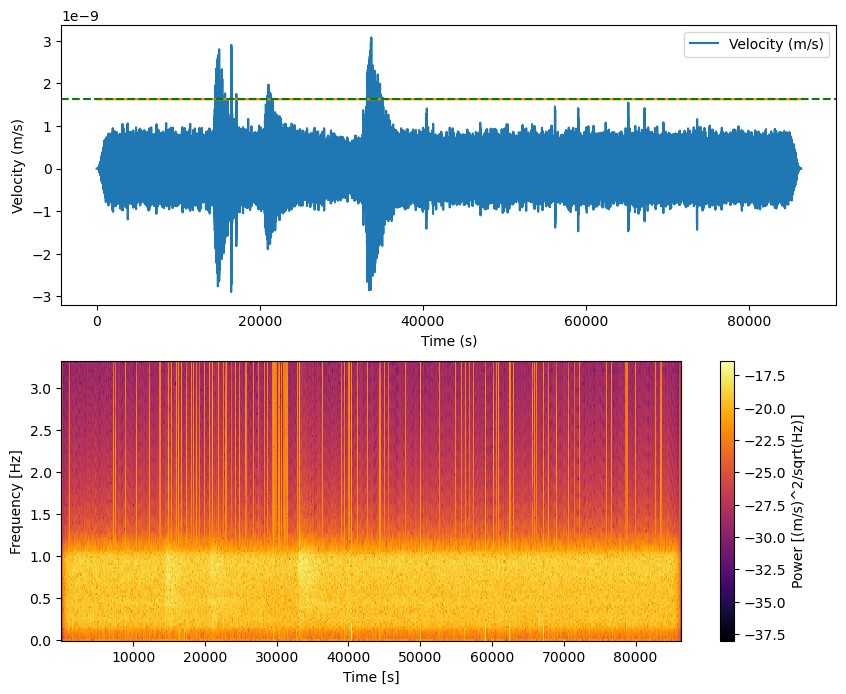

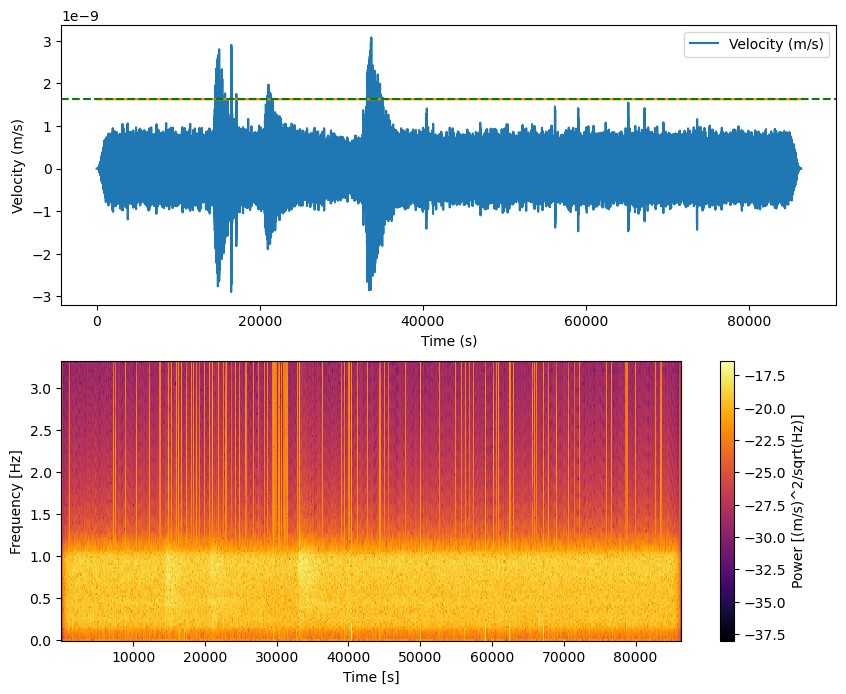

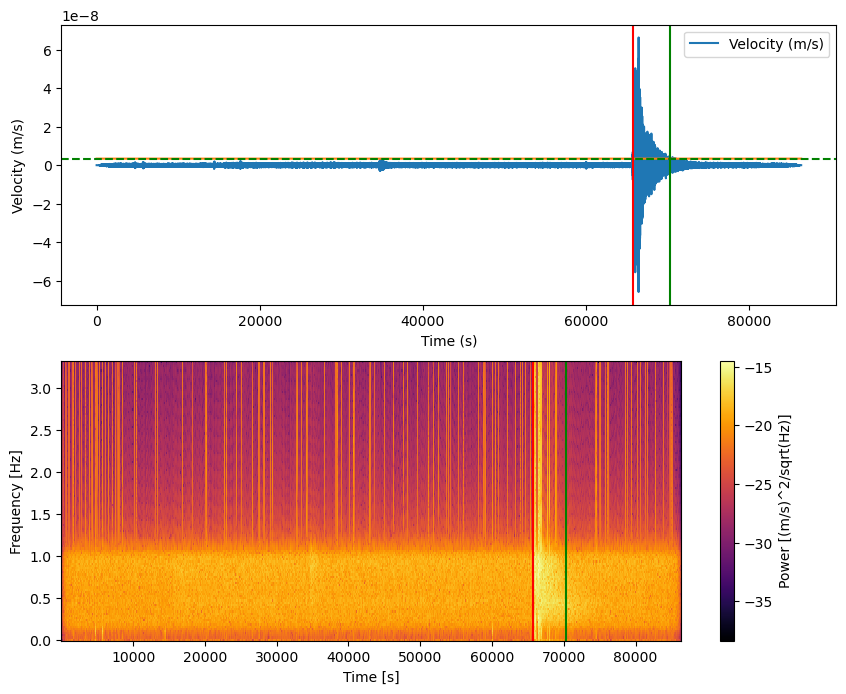

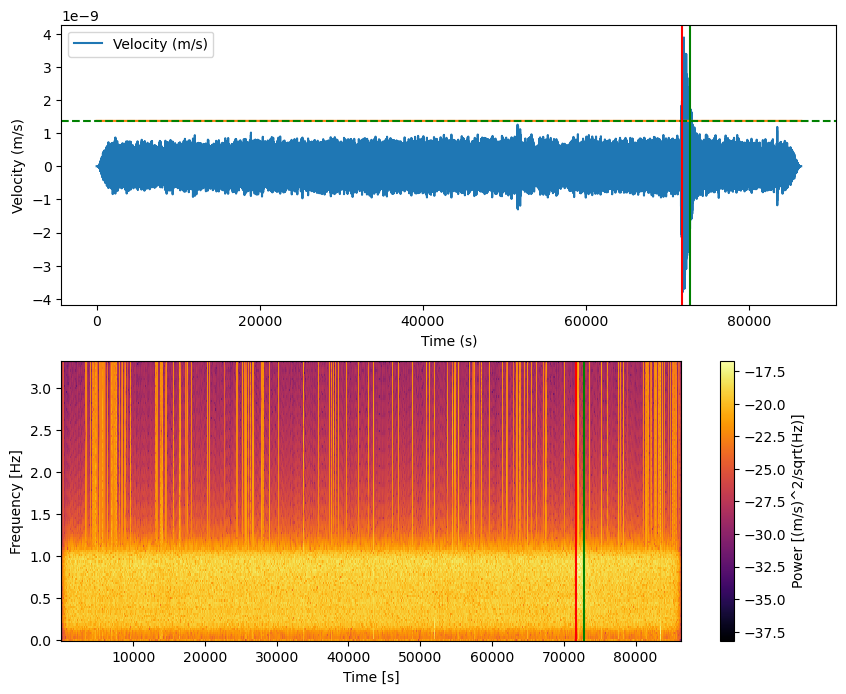

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

class SINN:
    def __init__(self, rel_time, data):
        self.rel_time = rel_time
        self.data = data
        abs_data = data.abs()
        mean = float(10 * abs_data.mean())
        abs_data = abs_data.transform(lambda x: x - mean / 5)
        mean /= 1.5
        self.mean = mean
        self.abs_data = abs_data
        self.on_time = int(len(self.rel_time) / 143)

    def plot(self):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        #fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [10, 8]})

        # Plot the velocity time series in the top subplot
        ax1.plot(self.rel_time, self.data, label="Velocity (m/s)")
        ax1.plot(self.rel_time, [self.mean for _ in range(len(self.rel_time))])
        ax1.axhline(self.mean, color='green', linestyle='--')
        
        on_off = True
        for i in range(len(self.abs_data)):
            if on_off:
                if float(self.abs_data[i]) >= self.mean:
                    bool_list = [float(j) >= self.mean for j in self.abs_data[i:i+self.on_time]]
                    true_value = 0
                    for bool_value in bool_list:
                        if bool_value:
                            true_value += 1
                    if bool_value >= 0.65:
                        ax1.axvline(times[i], color='red')
                        ax2.axvline(times[i], color='red')
                        on_off = False
            else:
                if float(self.abs_data[i]) <= self.mean:
                    bool_list = [float(j) <= self.mean for j in self.abs_data[i:i+3000]]
                    if all(bool_list):
                        ax1.axvline(self.rel_time[i], color='green')
                        ax2.axvline(self.rel_time[i], color='green')
                        on_off = True

        ax1.set_xlabel("Time (s)")
        ax1.set_ylabel("Velocity (m/s)")
        ax1.legend()

        # Spectrogram in the bottom subplot using pcolormesh
        f, t, Sxx = signal.spectrogram(self.data, fs=1/(self.rel_time[1] - self.rel_time[0]))

        pcm = ax2.pcolormesh(t, f, np.log10(Sxx), shading='auto', cmap='inferno')
        ax2.set_ylabel('Frequency [Hz]')
        ax2.set_xlabel('Time [s]')
        cbar = fig.colorbar(pcm, ax=ax2, label='Power [(m/s)^2/sqrt(Hz)]')

        #plt.tight_layout()


# Assuming you have catalog.csv with filenames
catalog = pd.read_csv("C:\\Users\\sammu\\Notebooks\\space_apps_2024_seismic_detection\\space_apps_2024_seismic_detection\\data\\lunar\\lunar_test\\data\\S15_GradeA\\catalogue.csv")
training_data_filename = []


for filename in catalog["filename"]:
    training_data_filename.append(filename)
    
for file in training_data_filename:
    df = pd.read_csv(file)
    times = df["time_rel(sec)"]
    data = df["velocity(m/s)"]
    sinn = SINN(times, data)
    #plt.title(file[-40:])
    sinn.plot()